In [202]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt

In [102]:
price_data = pd.read_csv('ERIC-B-2018-01-01-2019-01-01.csv', sep=';')

In [208]:
price_data2 = pd.read_csv('./source_data/SPY.csv', sep=',')
price_data2.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-11-26,115.750000,116.339996,115.070000,115.93,82.458862,13726000
1,2001-11-27,115.620003,116.900002,114.089996,115.43,82.103249,19261400


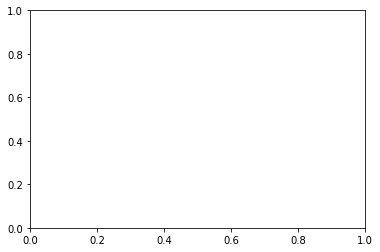

In [219]:
ax = plt.subplot()


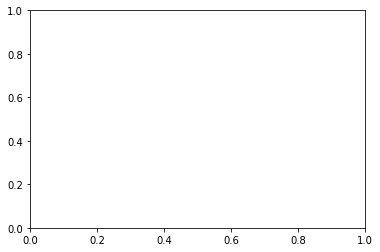

In [226]:
xaxis = price_data2['Date']
yaxis = price_data2['Adj Close']
ax = plt.subplot()

In [231]:
a = ['HEJ', 2]
a

['HEJ', 2]

In [222]:
ax.set(xlabel='Time', ylabel='Close')

[Text(3.200000000000003, 0.5, 'Close'), Text(0.5, 3.1999999999999993, 'Time')]

In [103]:
price_data.drop(['Unnamed: 11','Bid','Ask','Low price','Average price', 'Total volume', 'Turnover', 'Trades'], inplace=True, axis=1)

In [223]:
ax.grid()

In [104]:
# tday = price_data['Date', '']
# cls = price_data['Closing price']

price_data['Date'] = price_data['Date'].str.replace('\D','').astype(int)

In [105]:
#tday = tday.str.replace('\D','').astype(int)

price_data = price_data.sort_values(ascending=True, by=['Date'])

In [106]:
price_data.head(5)

,Date,Opening price,High price,Closing price
249,20180102,"54,20","54,86","54,30"
248,20180103,"54,42","54,82","54,60"
247,20180104,"55,00","55,06","54,80"
246,20180105,"54,98","55,62","55,46"
245,20180108,"55,46","55,80","55,50"


In [109]:
price_data['Closing price'] = price_data['Closing price'].str.replace(',','.').astype(float)

In [124]:
cls = np.array(price_data['Closing price'])

In [234]:
a = np.array([1,2,3])
np.max(a)

3

In [131]:
daily_returns = (cls[1:] - cls[:len(cls)-1])/cls[:len(cls)-1]


In [132]:
excess_daily_returns = daily_returns - 0.04/252

In [135]:
(np.sqrt(252) * np.mean(excess_daily_returns))/np.std(excess_daily_returns)

1.1267069729215415

In [145]:
cls[1:]

array([54.6 , 54.8 , 55.46, 55.5 , 56.02, 55.3 , 55.88, 56.48, 56.36,
       56.  , 57.82, 58.5 , 58.56, 57.28, 57.08, 56.48, 54.6 , 54.04,
       54.98, 55.7 , 50.6 , 52.14, 53.8 , 51.6 , 50.14, 52.42, 51.56,
       51.78, 52.5 , 52.82, 53.06, 53.74, 54.08, 53.48, 54.74, 54.82,
       54.6 , 55.94, 56.64, 56.68, 55.76, 54.24, 53.78, 55.56, 55.76,
       55.52, 56.62, 56.94, 56.74, 56.1 , 55.92, 56.26, 55.78, 54.8 ,
       54.36, 54.82, 53.72, 53.94, 52.38, 53.7 , 53.96, 52.92, 52.14,
       51.52, 53.12, 52.82, 52.64, 53.14, 52.88, 53.56, 53.  , 53.38,
       54.82, 54.18, 55.56, 65.28, 65.  , 65.76, 66.82, 65.76, 65.7 ,
       67.2 , 66.72, 66.08, 68.14, 69.56, 69.52, 70.4 , 68.28, 67.5 ,
       67.28, 66.8 , 67.4 , 67.66, 67.64, 66.44, 65.28, 65.52, 65.26,
       64.8 , 64.84, 64.2 , 63.96, 64.18, 64.08, 64.16, 63.5 , 63.42,
       63.2 , 63.64, 66.64, 68.18, 68.06, 68.  , 69.96, 70.5 , 68.6 ,
       67.56, 67.16, 67.8 , 66.8 , 69.26, 67.78, 67.2 , 66.36, 66.6 ,
       67.56, 67.78,

In [144]:
cls[:len(cls)-1]

array([54.3 , 54.6 , 54.8 , 55.46, 55.5 , 56.02, 55.3 , 55.88, 56.48,
       56.36, 56.  , 57.82, 58.5 , 58.56, 57.28, 57.08, 56.48, 54.6 ,
       54.04, 54.98, 55.7 , 50.6 , 52.14, 53.8 , 51.6 , 50.14, 52.42,
       51.56, 51.78, 52.5 , 52.82, 53.06, 53.74, 54.08, 53.48, 54.74,
       54.82, 54.6 , 55.94, 56.64, 56.68, 55.76, 54.24, 53.78, 55.56,
       55.76, 55.52, 56.62, 56.94, 56.74, 56.1 , 55.92, 56.26, 55.78,
       54.8 , 54.36, 54.82, 53.72, 53.94, 52.38, 53.7 , 53.96, 52.92,
       52.14, 51.52, 53.12, 52.82, 52.64, 53.14, 52.88, 53.56, 53.  ,
       53.38, 54.82, 54.18, 55.56, 65.28, 65.  , 65.76, 66.82, 65.76,
       65.7 , 67.2 , 66.72, 66.08, 68.14, 69.56, 69.52, 70.4 , 68.28,
       67.5 , 67.28, 66.8 , 67.4 , 67.66, 67.64, 66.44, 65.28, 65.52,
       65.26, 64.8 , 64.84, 64.2 , 63.96, 64.18, 64.08, 64.16, 63.5 ,
       63.42, 63.2 , 63.64, 66.64, 68.18, 68.06, 68.  , 69.96, 70.5 ,
       68.6 , 67.56, 67.16, 67.8 , 66.8 , 69.26, 67.78, 67.2 , 66.36,
       66.6 , 67.56,

In [200]:
ary = np.array([1, 2, 3, 4, 5])
ary[1:] = (np.ones(len(ary)-1) + ary[1:]) * (np.ones(len(ary)-1) + ary[:len(ary)-1]) - np.ones(len(ary)-1)

In [201]:
for x in range(0, len(ary)):
    print(ary[x])

1
5
11
19
29


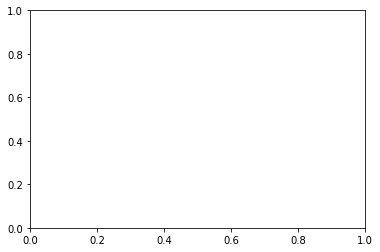

In [207]:
ax = plt.subplot()

In [ ]:
ax.plot()